In [1]:
# 画图(为什么和书上画出来的图不一样？看不出有什么问题)

import matplotlib.pyplot as plt
def lg_plot(clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.show()

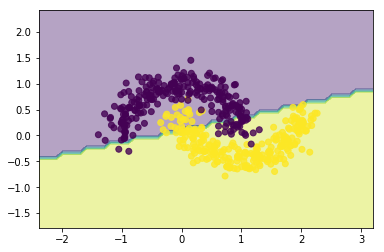

In [8]:
# 线性SVM分类
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# 卫星数据
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.15, random_state=1)

svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=10, loss="hinge", max_iter=10000)),
    ))

svm_clf.fit(X, y)
lg_plot(svm_clf)

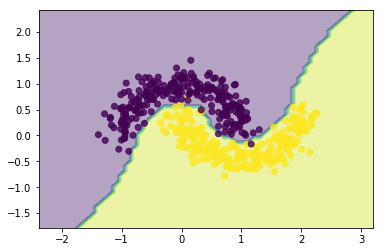

In [7]:
# 添加多项式特性，然后线性分类
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline((
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=10000)),
    ))

polynomial_svm_clf.fit(X, y)
lg_plot(polynomial_svm_clf)

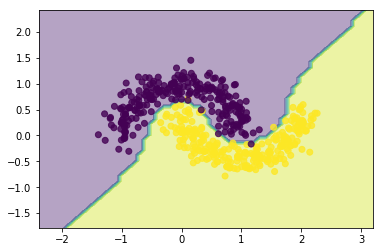

In [9]:
#使用多项式核
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)) # SVC没有损失函数？
    ))

poly_kernel_svm_clf.fit(X, y)
lg_plot(poly_kernel_svm_clf)

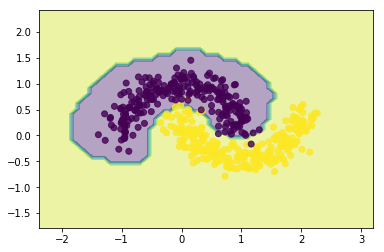

In [10]:
#高斯RBF核函数

rbf_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("linear_svc", SVC(kernel="rbf", gamma=5, C=0.001)),
    ))

rbf_kernel_svm_clf.fit(X, y)
lg_plot(rbf_kernel_svm_clf)